## Exploratory Data Analysis(EDA) with Titanic Data Set
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

* To take a closer look at the data take help of `.head()` function of pandas library which returns first five observations of the data set.Similarly `.tail()` returns last five observations of the data set.
* To found out the total number of rows and columns in the data set using `.shape`.
* To see label of each columns in the data set using `.columns.values`
* It is also a good practice to know the columns and their corresponding data types,along with finding whether they contain null values or not with `.info()`
* The `.describe()` function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
* Few key insights just by looking at dependent variable are as follows:
    * `.column.unique()`
    * `.column.value_counts()`
* To chech missing values in the data set's columns using `.isnull().sum()`
* To use `linear regression` for modelling,its necessary to remove correlated variables to improve your model.One can find correlations using pandas `.corr()` function and can visualize the correlation matrix using a heatmap in seaborn.
    * Dark shades represents positive correlation while lighter shades represents negative correlation.
    * If you set annot=True, you’ll get values by which features are correlated to each other in grid-cells.
    * It’s a good practice to remove correlated variables during feature selection.
* To check `Outliers`: `A box plot` (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables.The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution.
* To check `the linearity of the variables` it is a good practice to `plot distribution graph` and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

In [1]:
#This librarys is to work with matrices
import pandas as pd 
# This librarys is to work with vectors
import numpy as np
# This library is to create some graphics algorithmn
import seaborn as sns
# to render the graphs
import matplotlib.pyplot as plt
# import module to set some ploting parameters
from matplotlib import rcParams
# Library to work with Regular Expressions
import re
# to ignore filterwarnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from IPython.display import Image

# This function makes the plot directly on browser
%matplotlib inline

%config Completer.use_jedi = False

# Seting a universal figure size 
rcParams['figure.figsize'] = 8,6

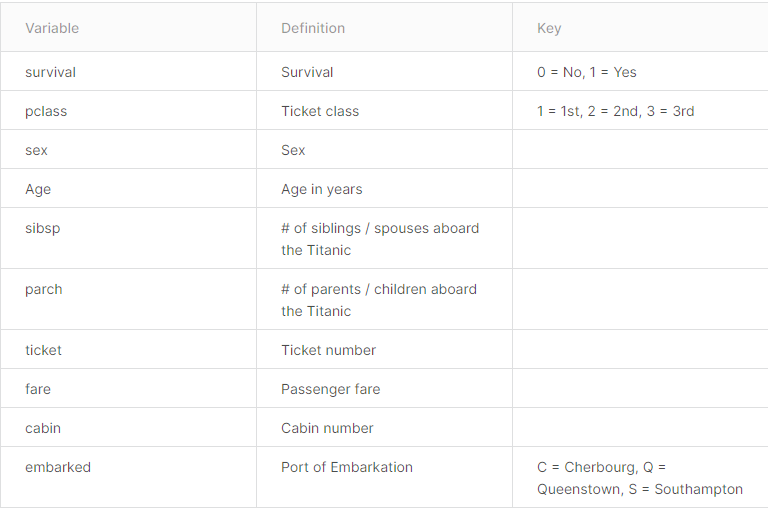

In [2]:
# Data Dictionary:
Image(filename='data_dict.png')

In [3]:
# Importing train dataset and to check first 5 rows of each column:

df_train = pd.read_csv("train.csv")

In [4]:
def df_first_look(df):
    """
    This function gets a Python Pandas dataframe and visualize basic information about the dataframe. 
    :param df: Dataframe to be analyze 
    :return: This function doesn't return anything.      
    """
    try:
        print("First 5 rows of dataframe:\n--------------------------\n", df.head()) 
        print("")
        print("Last 5 rows of dataframe:\n--------------------------\n", df.tail()) 
        print("")
        print("Row count of dataframe:\n-----------------------\n",df.shape[0],"\nColumn count of dataframe:\n--------------------------\n",df.shape[1])
        print("")
        print("List of columns in the dataframe:\n---------------------------------\n", df.columns.values)
        print("")
        print("Looking NaN values and datatypes of columns in the dataframe:\n--------------------------------------------\n")
        print(df.info())
        print("") 
    
    except Exception as e:
        print("Error at df_first_look function: ",str(e))       

In [5]:
df_first_look(df_train)

First 5 rows of dataframe:
--------------------------
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  


### Summary Statistics:

In [6]:
def df_statistics_look(df,column1,column2):
    """
    This function gets a Python Pandas dataframe and visualize basic statistic information about the dataframe. 
    :param df: Dataframe to be analyze 
    :return: This function doesn't return anything.  
    
    """
    print(f"Basic Statisctics for {column1} and {column2}:\n--------------------------\n", df_train[[column1,column2]].describe())
    print("")
    print(f"Mode values for {column1} and {column2}:\n--------------------------\n", df_train[[column1,column2]].mode())
    print("")

In [7]:
df_statistics_look(df_train,"Age","Fare")

Basic Statisctics for Age and Fare:
--------------------------
               Age        Fare
count  714.000000  891.000000
mean    29.699118   32.204208
std     14.526497   49.693429
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     80.000000  512.329200

Mode values for Age and Fare:
--------------------------
     Age  Fare
0  24.0  8.05



##### Observations:
* We have ordinal, nominal, dicrete and Continuous columns in this analysis. I'll use only  Continuous columns that are Age and Fare columns. 
* Avg age and median-mode are so closely. Distribution is right skewed (positive skew). Avg passengers age shows that most of passenger is young.
* There are outliers at both columns. 
* Avg , median and mode of Fare are not closely. Distribution is right skewed (positive skew). Median and mode of passenger's fare shows that most of passenger took cheap tickets.

#### Understanding Target Variable

In [8]:
df_train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

* Target variable/Dependent variable is discrete and categorical in nature.
* "Pclass" shows class of cabins that are from 1 to 3:  1 = 1st, 2 = 2nd, 3 = 3rd
* All Classes have passangers.

* 3rd class has most passangers.After 3rd, 1st came and 2nd class has less passangers. 

#### To Extract Appellation of Names with Correct Ones:

In [9]:
#lets extract the Appellations 
def extract_first_string(df,column_to_be_used,column_to_be_created):
    """
    This function gets a Python Pandas dataframe and extracting the middle string from name column in the dataframe. 
    :param df: Dataframe to be analyze 
    :param column_to_be_used: The column is to be used to extract the middle string to the new column.  
    :param column_to_be_created: The column is to be created from "column_to_be_used"
    :return: Returning Python Pandas dataframe.  
    """
    try:
        
        df[column_to_be_created] = df[column_to_be_used].str.extract('([A-Za-z]+)\.')
        
        df_train[column_to_be_created].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                         'Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Officer','Officer','Mrs','Mrs','Mr',
                         'Officer','Officer','Officer','Mr','Mr'],inplace=True)
        
        return df

    except Exception as e:
        print("Error at df_first_look function: ",str(e)) 
        return df

In [10]:
df_train = extract_first_string(df_train,"Name","Appellation")

In [11]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Appellation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [12]:
# Defining the figure size of our graphic
def countplot_viz(data,xlabel_column,ylabel_column,title):
    plt.figure(figsize=(8,5))

    sns.countplot(x=xlabel_column, data=data, palette="mako")
    plt.xlabel(xlabel_column, fontsize=16) #seting the xtitle and size
    plt.ylabel(ylabel_column, fontsize=16) # Seting the ytitle and size
    plt.title(title, fontsize=20) 
    plt.xticks(rotation=45)
    plt.show()

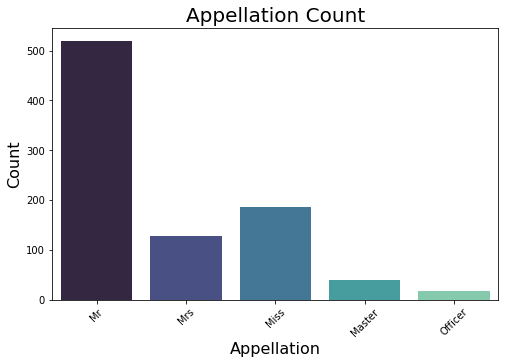

In [13]:
countplot_viz(df_train,"Appellation","Count","Appellation Count")

#### To Check Missing Values

<AxesSubplot:>

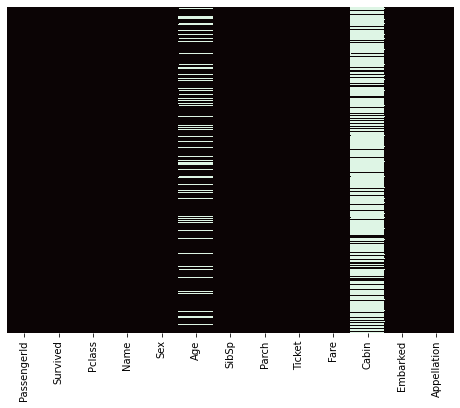

In [14]:
# To see missing values with heatmap:

sns.heatmap(df_train.isnull(),cbar=False,yticklabels=False,cmap = 'mako')

#### To Fill Missing Values of Age Column:

* We can fill as appellation of People for example;
    * df_train.groupby('appellation')['Age'].mean() #to check the average age by appellation
    * df_train.loc[(df_train.Age.isnull())&(df_train.appellation == 'Mr'),'Age']=33  # Assigning the NaN Values with the Ceil values of the mean ages (We do it for each appellation) 
I don't choose this option. Because I have to prepare same line for each appellation again and again. I want to create a function for using it at future projects. 


* We can add some condition for doing specific filling. Let's group the median age by sex, pclass and title, to have any idea and maybe input in Age NAN's: 
    *  df_train.groupby(["Sex","Pclass","appellation"])["Age"] #We can fill by sex, class of tickets and appellations.  
    * df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','appellation']).Age.transform('median') # using the groupby to transform this variables
    

* We can create a function with this formulation. Also we can use it at other columns that have missing values or we can use it at future projects.   

In [15]:
def calculating_descriptive_statistic(df,column1,column2,column3,cal_column,descriptive_statistic):
    """
    This function gets a Python Pandas dataframe and calculating aggregation by columns in the dataframe. 
    :param df: Dataframe to be analyze 
    :param column1: For showing values by this column in group. 
    :param column2: For showing values by this column in group. 
    :param column3: For showing values by this column in group. 
    :param cal_column: Calculation aggregation for this column. 
    :param descriptive_statistic: It shows which we use descriptive statistic(Mean,Median,Standard dev,Min,etc.)
    :return: This function doesn't return anything.  
    
    """
    if descriptive_statistic== 1:
        age_group = df.groupby([column1,column2,column3])[cal_column]

        print(age_group.median())
        
    elif descriptive_statistic== 2:
        age_group = df.groupby([column1,column2,column3])[cal_column]

        print(age_group.mean())        

In [16]:
calculating_descriptive_statistic(df_train,"Sex","Pclass","Appellation","Age",1)

Sex     Pclass  Appellation
female  1       Miss           29.5
                Mrs            41.5
                Officer        49.0
        2       Miss           24.0
                Mrs            32.0
        3       Miss           18.0
                Mrs            31.0
male    1       Master          4.0
                Mr             40.0
                Officer        51.0
        2       Master          1.0
                Mr             31.0
                Officer        46.5
        3       Master          4.0
                Mr             26.0
Name: Age, dtype: float64


In [17]:
# To create a function for filling missing values: 

def missing_data_filler(df, group_list, column_to_be_filled):
    """
    This function gets a Python Pandas dataframe and filling missing values in the column of the dataframe. 
    :param df: Dataframe to be analyze 
    :param group_list: The list of columns
    :param column_to_be_filled: The column's NaN values are filled.    
    :return: Dataframe  
    
    """
    df_dummy = df.groupby(group_list)[column_to_be_filled].transform('median') #to see age group's medians
    
    df.loc[df[column_to_be_filled].isnull(), column_to_be_filled] = df_dummy #to fill the rows by age group
    
    return df 

In [18]:
column_list = ["Sex","Pclass","Appellation"]
df_train = missing_data_filler(df_train,column_list,'Age')

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Appellation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [20]:
# Printing the total of nulls in Age column:

df_train.isnull().sum()
# or 
print(df_train["Age"].isnull().sum())  # We filled all missing rows at Age column. 

0


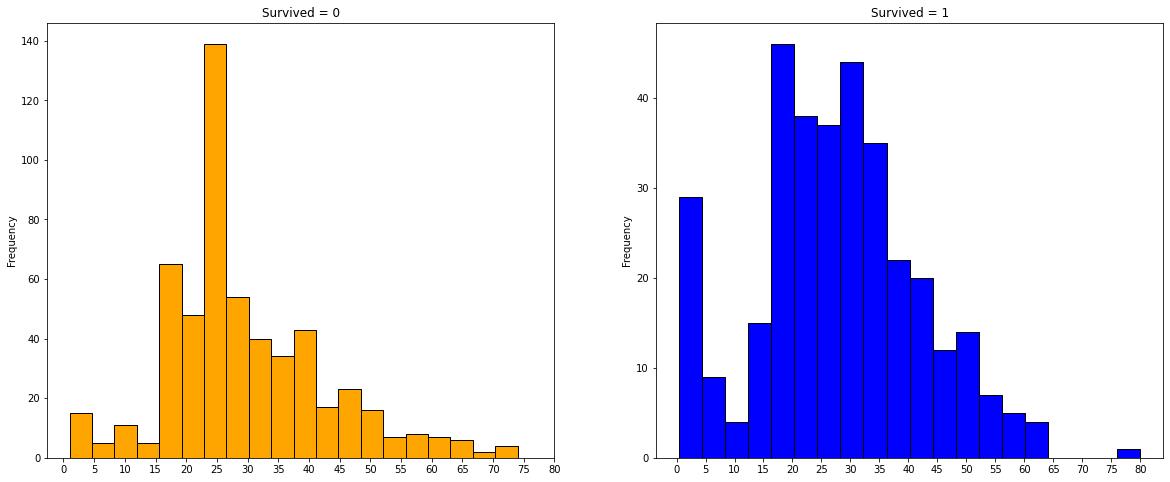

In [21]:
# To see people's ages who are survived or not survived: 

# Seting the figure size
f,ax=plt.subplots(1,2,figsize=(20,8))

df_train[df_train['Survived'] == 0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='orange')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

df_train[df_train['Survived'] == 1].Age.plot.hist(ax=ax[1],bins=20,edgecolor='black',color='blue')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

##### Observations:
* The age<5 were saved in large numbers(The Women and Child First Policy).
* The group of between 17 and 36 were saved in large numbers. 
* The oldest Passenger was saved(80 years).
* Maximum number of deaths were in the age group of 23-27.

### To See Other Conditions About Survived People:

#### The Relationship between Sex, Pclass and Survived People:

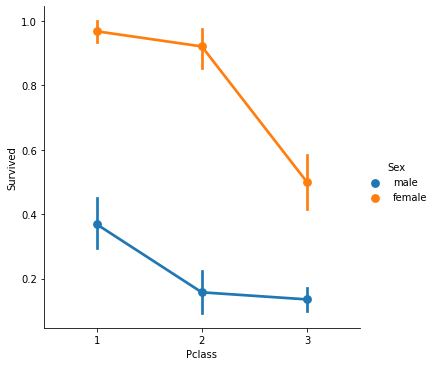

In [22]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
plt.show()

In [23]:
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='mako')

In [24]:
pd.crosstab([df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='mako')

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


##### Observations:
* Because of The Women and Child First Policy, women survived more than men. 
* We can see the discrimination between classes. First class more survived than third class.  
* It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate. 
* Death rate by class:
    * %67,75 third class
    * %17,66 second class
    * %14,59 first class 
* Survived rate by class:
    * %34,80 third class
    * %25,43 second class
    * %39,76 first class

#### The Relationship Between Appellation and Survived People:

In [25]:
pd.crosstab(df_train.Appellation,df_train.Sex).T.style.background_gradient(cmap='mako') #Checking the Initials with the Sex

Appellation,Master,Miss,Mr,Mrs,Officer
Sex,,,,,
female,0,186,0,127,1
male,40,0,520,0,17


In [26]:
# Defining the figure size of our graphic
def countplot_group(data,xcolumn,xlabel_column,ylabel_column,groupped_column,title):
    plt.figure(figsize=(12,5))

    sns.countplot(x=xcolumn, data=data, hue=groupped_column, palette="mako")
    plt.xlabel(xlabel_column, fontsize=16) #seting the xtitle and size
    plt.ylabel(ylabel_column, fontsize=16) # Seting the ytitle and size
    plt.title(title, fontsize=20) 
    plt.xticks(rotation=45)
    plt.show()

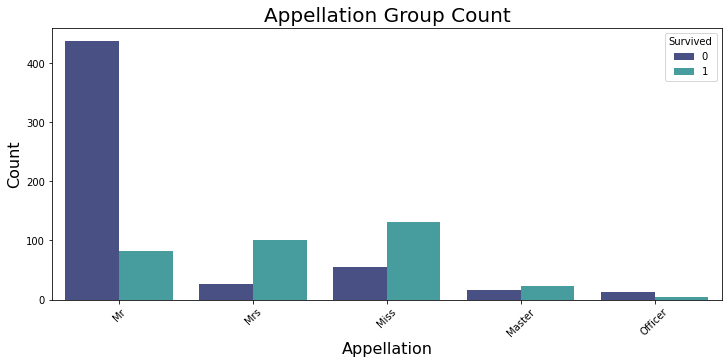

In [27]:
countplot_group(df_train,"Appellation","Appellation","Count","Survived","Appellation Group Count")

##### Observations:
* This charts confirmed us about women and children survived more than men.
* Employees is bottom at survived people. 

In [28]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Appellation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


#### The Relationship Between Port of Embarkation and Survived People:

In [29]:
pd.crosstab(df_train.Survived,df_train.Embarked,margins=True).style.background_gradient(cmap='mako')

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,217,340
All,168,77,644,889


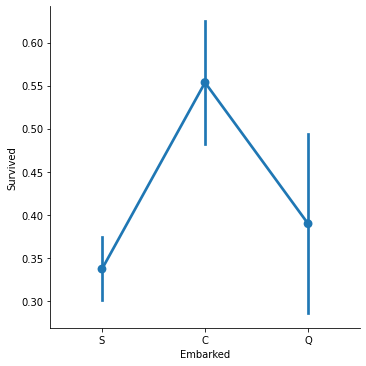

In [30]:
sns.factorplot('Embarked','Survived',data=df_train)
plt.show()

##### Observations:
* Death rate by Port of Embarkation:
    * %8,56 C = Cherbourg, France
    * %13,67 Q = Queenstown,Ireland
    * %77,77 S = Southampton, England


* Survived rate of Ports: 
    * %55,36 of Cherbourg passangers were survived.
    * %38,96 of Queenstown passangers were survived.
    * %33,70 of Southampton passangers were survived.
    * The chances for survival for Port C is highest around 0.55 while it is lowest for S.

#### The Relationship Between Port of Embarkation, Pclass and Survived People:

In [31]:
pd.crosstab([df_train.Embarked,df_train.Pclass],df_train.Survived,margins=True).style.background_gradient(cmap='mako')

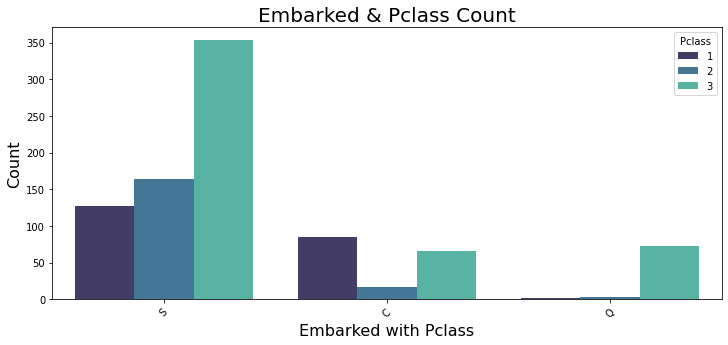

In [32]:
countplot_group(df_train,"Embarked","Embarked with Pclass","Count","Pclass","Embarked & Pclass Count")

In [33]:
pd.crosstab([df_train.Embarked,df_train.Sex],df_train.Survived,margins=True).style.background_gradient(cmap='mako')

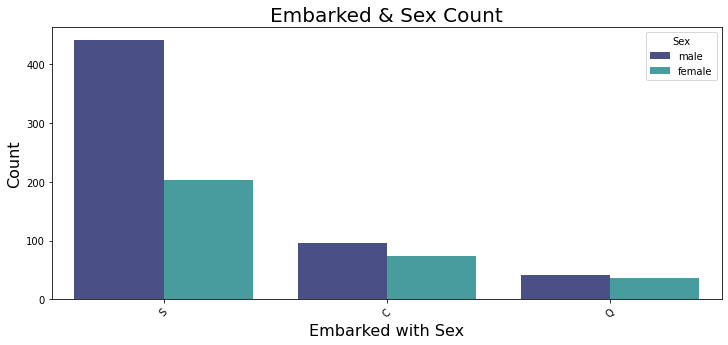

In [34]:
countplot_group(df_train,"Embarked","Embarked with Sex","Count","Sex","Embarked & Sex Count")

##### Observation: 
* Third class passengers mostly embarked from Southampton, England. Top death rate belong this port. 
* Death rate of Port Southampton's men passangers is %85,25. 

#### The Relationship Between SibSp(Sibling/Spouse) and Survived People:

* This feature represents whether a person is alone or with his family members.
    * Sibling = brother, sister, stepbrother, stepsister
    * Spouse = husband, wife
    * 0 = The person is alone 1,2,3,4,5,6,7,8 = Number of family person 

In [35]:
pd.crosstab(df_train.SibSp,df_train.Survived,margins=True).style.background_gradient(cmap='mako')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


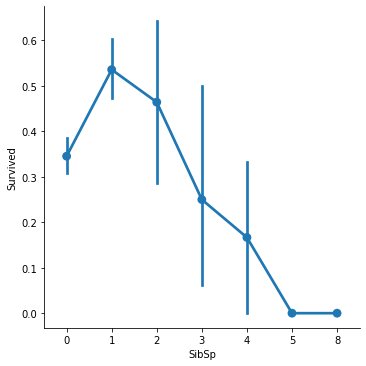

In [36]:
sns.factorplot('SibSp','Survived',data=df_train)
plt.show()

##### Observation:
* %68,17 of passengers had not sibling and spouse.
* %61,17 of survived passengers were alone. %34,21 of alone passengers were survived. 
* If person have 1 or 2 family member, survived chance increase. But if they have more family member, survived chance decrease. Probably they tried to save all of them but they didn't it. 

#### The Relationship Between Parch( parents / children) and Survived People:

* This feature represents whether a person is alone or with his family members.
    * Parent = mother, father
    * Child = daughter, son, stepdaughter, stepson
    * Some children travelled only with a nanny, therefore parch=0 for them.
    * 0 = The person is alone 1,2,3,4,5,6 = Number of family person 

In [37]:
pd.crosstab(df_train.Parch,df_train.Survived,margins=True).style.background_gradient(cmap='mako')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


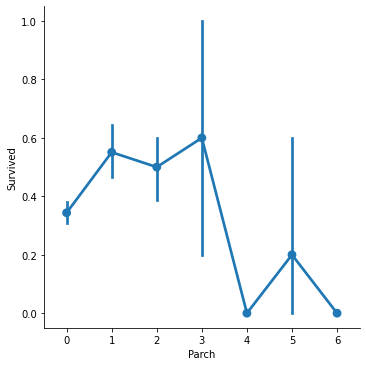

In [38]:
sns.factorplot('Parch','Survived',data=df_train)
plt.show()

##### Observation:
* %76,09 of passengers had not any parent or child.
* %68,12 of survived passengers were alone. %34,36 of alone passengers were survived. 
* If person have 1, 2 or 3 family member, survived chance increase. But if they have more family member, survived chance decrease. Probably they tried to save all of them but they didn't it. It is same with SibSp column. 

#### The Relationship Between Passanger Fare,Pclass and Survived People:

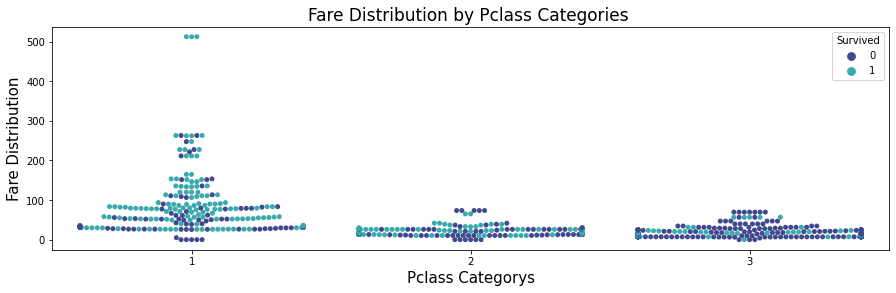

In [39]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,2)
sns.swarmplot(x='Pclass',y="Fare",data=df_train,
              hue="Survived", palette="mako" )
plt.ylabel("Fare Distribution", fontsize=15)
plt.xlabel("Pclass Categorys", fontsize=15)
plt.title("Fare Distribution by Pclass Categories ", fontsize=17)

plt.subplots_adjust(hspace = 0.5, top = 0.9)

plt.show()

##### Observation:
* The cheapest ticket fare belong Third class. Most of death in this class. 
* The most expensive ticket fare belong first class. Those who paid the highest fares were survived.

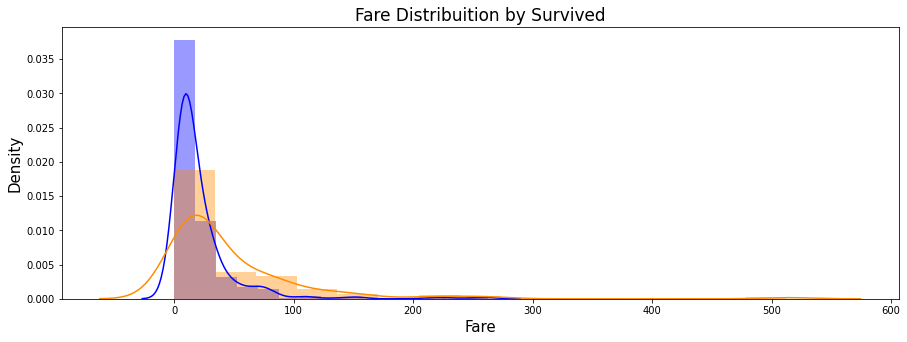

In [40]:
plt.figure(figsize=(15,5))

# Understanding the Fare Distribuition (Seaborn distplot lets you show a histogram with a line on it.)
sns.distplot(df_train[df_train.Survived == 0]["Fare"], 
             bins=15, color='b')
sns.distplot(df_train[df_train.Survived == 1]["Fare"], 
             bins=15, color='darkorange')
plt.title("Fare Distribuition by Survived", fontsize=17)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

#### Description Statisctics of Fare Variables

In [41]:
def calculating_descriptive_statistic_for_one_column(df,column_to_be_descriptived): 
    """
    This function gets a Python Pandas dataframe and visualize basic information about the dataframe. 
    :param df: Dataframe to be analyze 
    :param column_to_be_descriptived: We calculate descriptive statistics for this column. 
    :return: This function doesn't return anything.      
    """
    print(f"Min value of {column_to_be_descriptived}:", df[column_to_be_descriptived].min())
    print(f"Max value of {column_to_be_descriptived}:", df[column_to_be_descriptived].max())
    print(f"Median value of {column_to_be_descriptived}:", df[column_to_be_descriptived].median())
    print(f"Mean value of {column_to_be_descriptived}:", df[column_to_be_descriptived].mean())
    print(f"Standard Deviation value of {column_to_be_descriptived}:", df[column_to_be_descriptived].std())
    print(f"Mode value of {column_to_be_descriptived}:", df[column_to_be_descriptived].mode())

In [42]:
calculating_descriptive_statistic_for_one_column(df_train,"Fare")

Min value of Fare: 0.0
Max value of Fare: 512.3292
Median value of Fare: 14.4542
Mean value of Fare: 32.204207968574636
Standard Deviation value of Fare: 49.6934285971809
Mode value of Fare: 0    8.05
dtype: float64


#### The Correlation of Data Set

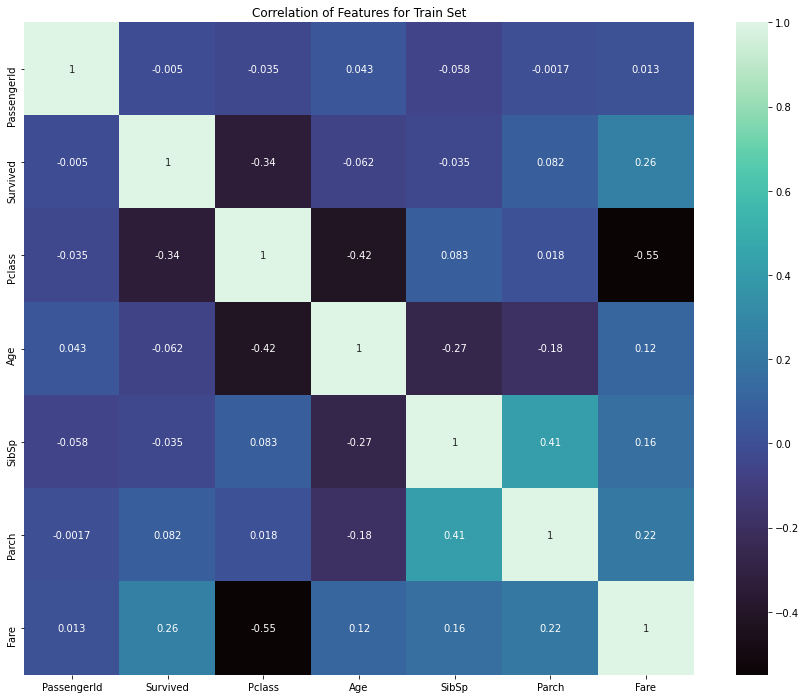

In [43]:
# lets look the correlation of df_train:

plt.figure(figsize=(15,12))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.corr(),vmax=1.0, annot=True,cmap='mako')
plt.show()

##### Observation:
* The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings.
* Correlation coefficient formulas are used to find how strong a relationship is between data. The formulas return a value between -1 and 1, where:
    * 1 indicates a strong positive relationship.
    * -1 indicates a strong negative relationship.
    * A result of zero indicates no relationship at all.
* From the above heatmap,we can see that the features are not much correlated. The highest positive correlation is between SibSp and Parch i.e 0.41. The highest negative correlation is between Pclass and Fare i.e -0.55. 